#### Title: "Fitbit Analysis"
#### Author: "Group Three"
#### Date: "7/16/2024"

***


# Overview of Project
Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device. Analyzing smart device fitness data could help unlock new growth opportunities for the company 
market. 

***

# Step 1 - Ask
### Business Task
The business task is to analyze *Fitbit* smart device usage data in order to gain insight into how consumers currently use their smart devices and to discover underlying trends that can be applied to *Bellabeat* products. This insight could help unlock new growth opportunities and the best marketing strategy to meet business growth goals. 

***
# Step 2 - Prepare

### Description of the Dataset

We have used a public dataset that explores smart device users’ daily habits.

Name: FitBit Fitness Tracker Data 
Link: https://www.kaggle.com/

"This Kaggle data set contains personal fitness tracker from fitbit users. Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.


### Limitations
* There are limited users. The sample size may not be representative of the population.
* There are only a few categorical variables to categorize the data for analysis. 
* Each dataset has 30 days of data from 4/12/2016 to 5/12/2016, but the dataset description 

### ROCCC Validation of Dataset
* Reliable - We will assume this data is accurate and reliable.
* Original - The data is original as it is directly gathered from users
* Comprehensive - The data is not comprehensive as it does not have all details needed for a full detailed analysis to meet the business goal
* Current - The data is not current as the data is from 2016.
* Cited - The data is cited. 

### Data Summary 
Overall, this data may not be appropriate for conducting a full detailed analysis to meet the goal of the business. However, we will move forward with the data to uncover any insights. 

Ideally, we would be having a sample size that is more representative of the whole population, at least 6 months of data from a more current year, and gendered data so that we can gain insight into the specific female trends.

### Data Sensitivity
This is public data. No data was identified as sensitive and therefore we will not need to have Data anonymization / De-identification of any data. Also, there is no need to encrypt the data.

### Setup Environment with Packages

## Import library and Read csv files

In [94]:
        
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
import pathlib as Path
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import time
import warnings
warnings.filterwarnings("ignore")


In [95]:

dailyActivity = pd.read_csv("Resources/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyCalories = pd.read_csv("Resources/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyIntensity = pd.read_csv("Resources/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailyStep = pd.read_csv("Resources/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
heartrate = pd.read_csv("Resources/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourlyCalories = pd.read_csv("Resources/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourlyIntensities = pd.read_csv("Resources/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlySteps = pd.read_csv("Resources/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
minuteSleep = pd.read_csv("Resources/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
sleepDay = pd.read_csv("Resources/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLogInfo = pd.read_csv("Resources/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")



## Preview the datasets

In [96]:
print("dailyActivity")
dailyActivity.head()

print("dailyCalories")
dailyCalories.head()

print("dailyIntensity")
dailyIntensity.head()

print("dailyStep")
dailyStep.head()

print("heartrate_seconds")
heartrate.head()

print("hourlyCalories")
hourlyCalories.head()

print("hourlyIntensities")
hourlyIntensities.head()

print("hourlySteps")
hourlySteps.head()

print("minuteSleep")
minuteSleep.head()

print("sleepDay")
sleepDay.head()

print("weightLogInfo")
weightLogInfo.head()

dailyActivity
dailyCalories
dailyIntensity
dailyStep
heartrate_seconds
hourlyCalories
hourlyIntensities
hourlySteps
minuteSleep
sleepDay
weightLogInfo


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


## Cleaning data

### Check if there are any nulls 
only weighLogInfo dataset has 1 column with null values: Fat (65) 

### Verifying numbers of users 
for each datasets so we which one we can work with

In [97]:
print("--dailyActivity--")
print(dailyActivity.isna().sum())
print(dailyActivity['Id'].nunique())



print("--dailyCalories--")
dailyCalories.isna().sum()
dailyCalories['Id'].nunique()

print("--dailyIntensity--")
dailyIntensity.isna().sum()
dailyIntensity['Id'].nunique()

print("--dailyStep--")
dailyStep.isna().sum()
dailyStep['Id'].nunique()

print("--heartrate_seconds--")
heartrate.isna().sum()
heartrate['Id'].nunique()

print("--hourlyCalories--")
hourlyCalories.isna().sum()
hourlyCalories['Id'].nunique()

print("--hourlyIntensities--")
hourlyIntensities.isna().sum()
hourlyIntensities['Id'].nunique()

print("--hourlySteps--")
hourlySteps.isna().sum()
hourlySteps['Id'].nunique()

print("--minuteSleep--")
minuteSleep.isna().sum()
minuteSleep['Id'].nunique()

print("--sleepDay--")
sleepDay.isna().sum()
sleepDay['Id'].nunique()

print("--weightLogInfo--")
weightLogInfo.isna().sum()
weightLogInfo['Id'].nunique()


--dailyActivity--
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64
33
--dailyCalories--
--dailyIntensity--
--dailyStep--
--heartrate_seconds--
--hourlyCalories--
--hourlyIntensities--
--hourlySteps--
--minuteSleep--
--sleepDay--
--weightLogInfo--


8

### Check for duplicates

In [98]:
dataframes_to_check = [
    ("dailyActivity", dailyActivity),
    ("dailyCalories", dailyCalories),
    ("dailyIntensity", dailyIntensity),
    ("dailyStep", dailyStep),
    ("heartrate", heartrate),
    ("hourlyCalories", hourlyCalories),
    ("hourlyIntensities", hourlyIntensities),
    ("hourlySteps", hourlySteps),
    ("minuteSleep", minuteSleep),
    ("sleepDay", sleepDay),
    ("weightLogInfo", weightLogInfo)
]

for df_name, df in dataframes_to_check:
    duplicate_df = df[df.duplicated()]
    print("Duplicate rows in", df_name)
    print(duplicate_df)
    print("\n")

Duplicate rows in dailyActivity
Empty DataFrame
Columns: [Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories]
Index: []


Duplicate rows in dailyCalories
Empty DataFrame
Columns: [Id, ActivityDay, Calories]
Index: []


Duplicate rows in dailyIntensity
Empty DataFrame
Columns: [Id, ActivityDay, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes, SedentaryActiveDistance, LightActiveDistance, ModeratelyActiveDistance, VeryActiveDistance]
Index: []


Duplicate rows in dailyStep
Empty DataFrame
Columns: [Id, ActivityDay, StepTotal]
Index: []


Duplicate rows in heartrate
Empty DataFrame
Columns: [Id, Time, Value]
Index: []


Duplicate rows in hourlyCalories
Empty DataFrame
Columns: [Id, ActivityHour, Calories]
Index: []


Duplicate rows in hourlyInt

## Analyzing data

### After investigating the datasets, here are the questions I want to ask:

User Activity and Behavior
 - What is the average daily step count for users? 
 - How does physical activity vary across different days of the week?
 - What time of day do users typically reach their peak activity levels?
 - How many active minutes do users accumulate daily, and how does this compare to recommended levels?
2. Health Metrics
        What is the average resting heart rate for users, and how does it vary by age group or gender?
        How does the average heart rate change during different types of activities (e.g., walking, running, biking)?
        What are the average sleep duration and quality metrics (e.g., deep sleep, REM sleep) for users?

Since some of the data in the datasets are overlapped, here are the datasets I chose to use:
- DailyAcitvity
- Heartrate
- SleepDay

The following data manipulation is performed:

1. Convert *daily_activity["ActivityDate"]* to datatime64 dtype.
    Convert *hourlySteps["ActivityHour"]* to datatime64 dtype.

2. Convert format of *ActivityDate* to yyyy-mm-dd.

3. Create new column *DayOfTheWeek* by separating the date into day of the week for further analysis.

4. Create new column *TotalMins* being the sum of *VeryActiveMinutes*, *FairlyActiveMinutes*, *LightlyActiveMinutes* and *SedentaryMinutes*.

5. Create new column *TotalHours* by converting new column in #4 to number of hours.

6. Rearrange and rename columns.

In [99]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
daily_activity = dailyActivity
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")
hourlySteps["ActivityDate"] = pd.to_datetime(hourlySteps["ActivityHour"])
sleepDay['ActivityDate'] = pd.to_datetime(sleepDay['SleepDay'])
heartrate['Time'] = pd.to_datetime(heartrate['Time'])

# re-print information to confirm
daily_activity.info()
hourlySteps.info()
sleepDay.info()
heartrate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [100]:
#r create new list of rearranged columns
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

# reindex function to rearrange columns based on "new_cols"
df_activity = daily_activity.reindex(columns=new_cols)

# print 1st 5 rows to confirm
df_activity.head(5)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [101]:
# create new column "day_of_the_week" to represent day of the week
df_activity["DayOfTheWeek"] = df_activity["ActivityDate"].dt.day_name()

# print 1st 5 rows to confirm
df_activity["DayOfTheWeek"].head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

In [102]:
# rename columns
df_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

# print column names to confirm

df_activity.head(5)

,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


## Activity Data

We will begin by taking a closer look on more specific information surrounding our User Activity and Behavior.

## What is the average daily step count for users?

How active are they? 

We should be able to answer these questions through analysis.

In [103]:
#round(df_activity["total_steps"].mean(),0)
avg_daily_count = round(df_activity.groupby('id').agg({'total_steps': ['mean']}),0)
avg_daily_count.sort_values('id')


,total_steps
,mean
id,
1503960366,12117.0
1624580081,5744.0
1644430081,7283.0
1844505072,2580.0
1927972279,916.0
2022484408,11371.0
2026352035,5567.0
2320127002,4717.0


The average of total daily steps by the users is 7,638 steps.According to a study conducted in 2011 by BMC/BioMed Central, taking 10,000 steps a day is a reasonable target for healthy adults, helping reduce certain health conditions, such as high blood pressure and heart disease. In order to compare daily steps to an activity level, the following categories can be considered:

**Inactive** - Less than 5,000 steps/day
**Average** - Between 7,500 and 9,999 steps/day
**Very Active** - More than 12,500 steps/day

Given the information above, we can conclude that our users fall into the **Average** category. With this in mind, it becomes clear that the users should improve their amount of daily steps for optimal results regarging their health and well-being.

#### 2. How does physical activity vary across different days of the week?


In [104]:
df_weekday = df_activity.groupby(df_activity['day_of_the_week']).mean()
df_weekday.filter(['total_steps'])

,total_steps
day_of_the_week,
Friday,7448.230159
Monday,7780.866667
Saturday,8152.975806
Sunday,6933.231405
Thursday,7405.836735
Tuesday,8125.006579
Wednesday,7559.373333


<Axes: title={'center': 'Average of Total Steps by Day of Week'}, xlabel='Day of the Week', ylabel='Average of Total Steps'>

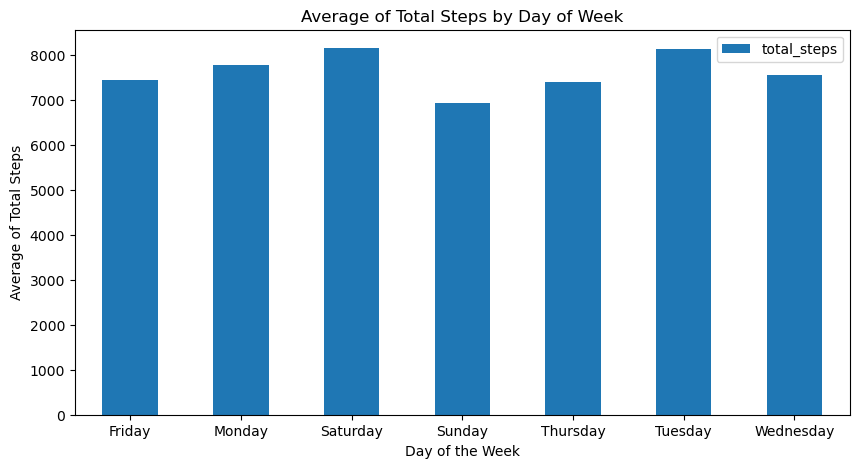

In [105]:
df_weekday['total_steps'].plot.bar(xlabel='Day of the Week', ylabel='Average of Total Steps', title='Average of Total Steps by Day of Week', legend=True, rot=0, figsize=(10,5))

#### 3. What time of day do users typically reach their peak activity levels? 

What are the most active hours of the users' day on average? Are they occurring during the day or at night?
There are 4 types of active, ranging from least to most: sedentary, lightly active, moderately active, very active

In [106]:
hourlySteps.head()

,Id,ActivityHour,StepTotal,ActivityDate
0,1503960366,4/12/2016 12:00:00 AM,373,2016-04-12 00:00:00
1,1503960366,4/12/2016 1:00:00 AM,160,2016-04-12 01:00:00
2,1503960366,4/12/2016 2:00:00 AM,151,2016-04-12 02:00:00
3,1503960366,4/12/2016 3:00:00 AM,0,2016-04-12 03:00:00
4,1503960366,4/12/2016 4:00:00 AM,0,2016-04-12 04:00:00


In [107]:
hourlySteps["ActivityHour"]=pd.to_datetime(hourlySteps["ActivityHour"])
hourlySteps["Dayofweek"]=hourlySteps["ActivityHour"].dt.day_name()


<Axes: title={'center': 'Peak Activity Levels of the Day'}, xlabel='Hour of the day', ylabel='Steps taken'>

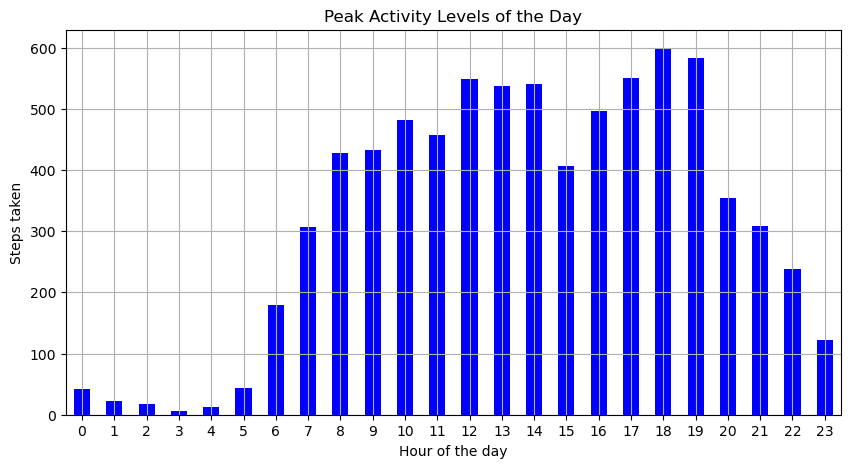

In [108]:
hourlySteps.groupby(hourlySteps["ActivityHour"].dt.hour)['StepTotal'].mean().plot(kind='bar',color='blue',title="Peak Activity Levels of the Day", xlabel="Hour of the day", ylabel="Steps taken", rot=0, figsize=(10,5), grid='True')


## 4. How many active minutes do users accumulate daily

Creating new column *total_mins* being the sum of total active minutes.

In [109]:
# create new column "total_mins" containing sum of total minutes.
df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]
df_activity["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

In [110]:

# daily_active_minute = round(df_activity.groupby('id').agg({'total_mins': ['mean']}),0)
daily_active_minute = df_activity[['id','total_mins']]
daily_active_minute

,id,total_mins
0,1503960366,1094
1,1503960366,1033
2,1503960366,1440
3,1503960366,998
4,1503960366,1040
...,...,...
935,8877689391,1440
936,8877689391,1440
937,8877689391,1440
938,8877689391,1440


This is quite intuitive as very active minutes are usually spent for doing exercises, while sedentary minutes and light active minutes are usually sitting walking

#### 4. How does heart rate look like throughout the day in average?

    Hour      Value
0      0  66.723642
1      1  65.642436
2      2  63.566506
3      3  61.143456
4      4  60.231779
5      5  63.178442
6      6  72.910595
7      7  75.196996
8      8  76.951884
9      9  80.703932
10    10  80.116789
11    11  79.147566
12    12  83.566121
13    13  81.041155
14    14  82.090328
15    15  79.366156
16    16  83.914978
17    17  84.810547
18    18  86.128509
19    19  82.797117
20    20  78.967916
21    21  75.127449
22    22  72.228438
23    23  69.272406


<Axes: title={'center': 'Average Heart Rate Throughout a Day'}, xlabel='Hour', ylabel='Average Heart Rate'>

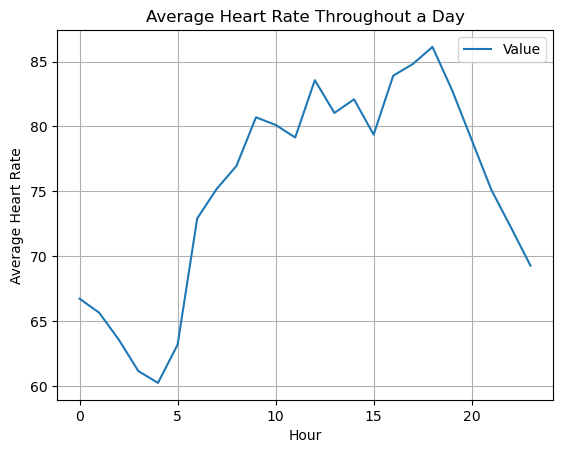

In [111]:
#Create a date column

# heartrate['Date'] = heartrate['Time'].astype(str).str[:10]
# heartrate['Date'] = pd.to_datetime(heartrate['Date'])

#Convert the 'Time' column to datetime objects
#heartrate['Time'] = pd.to_datetime(heartrate['Time'])

# Extract the hour from the 'Time' column and create a new 'Hour' column
heartrate['Hour'] = heartrate['Time'].dt.hour

#check the dtype and Hour column
heartrate.head()


# Group by 'Hour' and calculate the average 'Value' for each group
avg_heart_rate_by_hour = heartrate.groupby('Hour')['Value'].mean().reset_index()

print(avg_heart_rate_by_hour)

avg_heart_rate_by_hour.plot(kind="line", x = 'Hour', y='Value', title = 'Average Heart Rate Throughout a Day', ylabel= 'Average Heart Rate', grid='True')



#### 5. What is the average heart rate in days of the week?

                 Id                Time  Value  Hour       Date   WeekDay  \
0        2022484408 2016-04-12 07:21:00     97     7 2016-04-12   Tuesday   
1        2022484408 2016-04-12 07:21:05    102     7 2016-04-12   Tuesday   
2        2022484408 2016-04-12 07:21:10    105     7 2016-04-12   Tuesday   
3        2022484408 2016-04-12 07:21:20    103     7 2016-04-12   Tuesday   
4        2022484408 2016-04-12 07:21:25    101     7 2016-04-12   Tuesday   
...             ...                 ...    ...   ...        ...       ...   
2483653  8877689391 2016-05-12 14:43:53     57    14 2016-05-12  Thursday   
2483654  8877689391 2016-05-12 14:43:58     56    14 2016-05-12  Thursday   
2483655  8877689391 2016-05-12 14:44:03     55    14 2016-05-12  Thursday   
2483656  8877689391 2016-05-12 14:44:18     55    14 2016-05-12  Thursday   
2483657  8877689391 2016-05-12 14:44:28     56    14 2016-05-12  Thursday   

         WeekDayNBR  
0                 3  
1                 3  
2        

<Axes: title={'center': 'Average Heart Rate Through a Week'}, xlabel='WeekDay', ylabel='Average Heart Rate'>

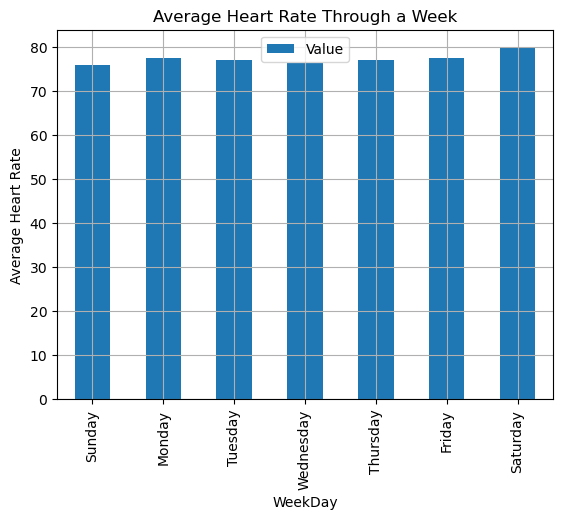

In [112]:
#Create a date column
heartrate['Date'] = heartrate['Time'].astype(str).str[:10]
heartrate['Date'] = pd.to_datetime(heartrate['Date'])

#create Weekday column based on Date column
heartrate['WeekDay'] = heartrate['Date'].dt.day_name()

#create a function to return a number for a weekday
def get_weekday_NBR(weekday):
    if weekday == "Sunday":
        return 1
    elif weekday == "Monday":
        return 2
    elif weekday == "Tuesday":
        return 3
    elif weekday == "Wednesday":
        return 4
    elif weekday == "Thursday":
        return 5
    elif weekday == "Friday":
        return 6
    else:
        return 7
    
#apply function to get weekday number
heartrate['WeekDayNBR'] = heartrate['WeekDay'].apply(get_weekday_NBR)

#check
print(heartrate)


#calculate average heart rate each week day group by ID
avg_heart_rate_by_weekday = heartrate.groupby(['WeekDay', 'WeekDayNBR'])['Value'].mean().reset_index()

#set index to WeekDayNBR
avg_heart_rate_by_weekday = avg_heart_rate_by_weekday.set_index('WeekDayNBR').sort_index(ascending = True)

#check
print(avg_heart_rate_by_weekday)

#bar chart for average heart rate in week days
avg_heart_rate_by_weekday.plot(kind="bar", x = 'WeekDay', y='Value', title = 'Average Heart Rate Through a Week', ylabel= 'Average Heart Rate', grid='True')




#### 6. Is there a correlation between walking and sleep?
I  used StepTotal in dailyStep df as the metric indicating walking distance, merged with SleepDay df

In [113]:
# Convert the 'SleepDay' & 'ActivityDay' to datetime data type
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'])
dailyStep['ActivityDay'] = pd.to_datetime(dailyStep['ActivityDay'])

#left join dailyStep and sleepDay on Id & Date
dailyStep_sleepDay_merge = dailyStep.merge(sleepDay, how='left', left_on=['Id', 'ActivityDay'], right_on=['Id', 'SleepDay'])

dailyStep_sleepDay_merge.head()




,Id,ActivityDay,StepTotal,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate
0,1503960366,2016-04-12,13162,2016-04-12,1.0,327.0,346.0,2016-04-12
1,1503960366,2016-04-13,10735,2016-04-13,2.0,384.0,407.0,2016-04-13
2,1503960366,2016-04-14,10460,NaT,NaN,NaN,NaN,NaT
3,1503960366,2016-04-15,9762,2016-04-15,1.0,412.0,442.0,2016-04-15
4,1503960366,2016-04-16,12669,2016-04-16,2.0,340.0,367.0,2016-04-16


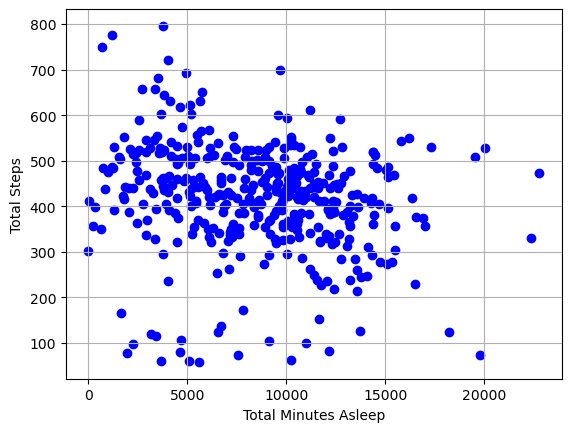

In [114]:
#make a scatterplot to check for correlation between StepTotal and TotalMinutesAsleep 
#dailyStep_sleepDay_merge.plot(kind = "scatter", x = 'StepTotal', y = 'TotalMinutesAsleep', grid='True')
plt.scatter(dailyStep_sleepDay_merge["StepTotal"], dailyStep_sleepDay_merge["TotalMinutesAsleep"], color='blue')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Steps')
plt.grid()
plt.show()

The scatter plot shows that there is no correlation between total steps and minutes asleep

In [115]:
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate
0,1503960366,2016-04-12,1,327,346,2016-04-12
1,1503960366,2016-04-13,2,384,407,2016-04-13
2,1503960366,2016-04-15,1,412,442,2016-04-15
3,1503960366,2016-04-16,2,340,367,2016-04-16
4,1503960366,2016-04-17,1,700,712,2016-04-17


In [123]:
sleepDay['SleepDay'] = pd.to_datetime(sleepDay['SleepDay'])
dailyCalories['ActivityDay'] = pd.to_datetime(dailyCalories['ActivityDay'])

#left join dailyStep and sleepDay on Id & Date
dailyCalories_sleepDay_merge = dailyCalories.merge(sleepDay, how='left', left_on=['Id', 'ActivityDay'], right_on=['Id', 'SleepDay'])

dailyCalories_sleepDay_merge.head()

,Id,ActivityDay,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate
0,1503960366,2016-04-12,1985,2016-04-12,1.0,327.0,346.0,2016-04-12
1,1503960366,2016-04-13,1797,2016-04-13,2.0,384.0,407.0,2016-04-13
2,1503960366,2016-04-14,1776,NaT,NaN,NaN,NaN,NaT
3,1503960366,2016-04-15,1745,2016-04-15,1.0,412.0,442.0,2016-04-15
4,1503960366,2016-04-16,1863,2016-04-16,2.0,340.0,367.0,2016-04-16


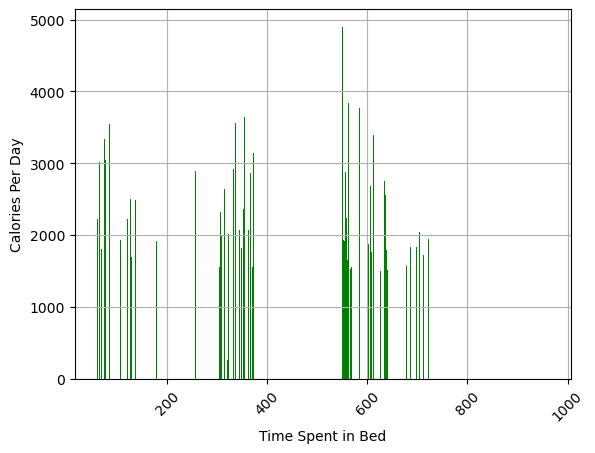

In [125]:
plt.bar(dailyCalories_sleepDay_merge['TotalTimeInBed'], dailyCalories_sleepDay_merge['Calories'], color='green')
plt.ylabel("Calories Per Day")
plt.xlabel("Time Spent in Bed")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [118]:
ff_date = dailyActivity.groupby("ActivityDate").agg({
    "TotalSteps": "sum",
    "TotalDistance": "mean",
    "Calories": "sum"
    })
ff_date.head()

,TotalSteps,TotalDistance,Calories
ActivityDate,,,
2016-04-12,271816,5.982727,78893
2016-04-13,237558,5.103333,75459
2016-04-14,255538,5.599394,77761
2016-04-15,248617,5.287879,77721
2016-04-16,277733,6.291563,76574


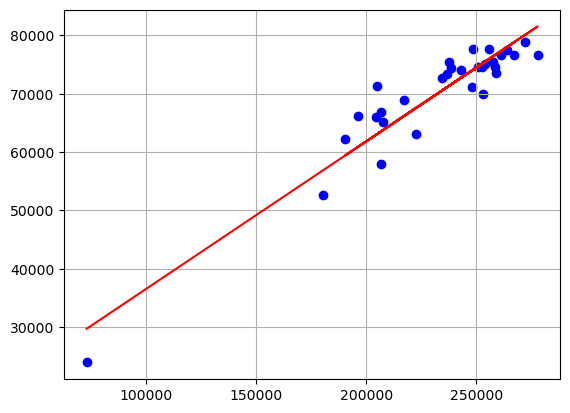

Coefficient: 0.25335085723218836
Intercept: 11175.034347900668


In [119]:
X = np.array(ff_date['TotalSteps'])
Y = np.array(ff_date['Calories'])
a = np.vstack([X, np.ones(len(X))]).T
m, c = np.linalg.lstsq(a, Y, rcond=None)[0]
y_pred = m * X + c
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred, color='red')
plt.grid()
plt.show()
print('Coefficient:', m)
print('Intercept:', c)

## Conclusion (Act phase)

### Insights and recommendations: